In [101]:
import pandas as pd
import numpy as np

In [102]:
primer_meetup = pd.read_csv('primer_meetup.csv')
df_sin_nombres = primer_meetup.drop('Nombre y Apellido', 1)

In [103]:
df_sin_nombres.head()

,Timestamp,Que temas tenes interés en ver en la primer meetup?,Que otros temas estarías interesado?,Cual es el nivel que desearías en la primer meetup?,"Queres dar una charla, armar un sprint?",Conveniencia de horarios para meetups en general
0,5/19/2015 15:43:27,"Raspberry pi desde Python,Data Analysis con Py...","GUIs con Python, como otra idea para abordar e...",Intermedio,NaN,Sabados y domingos (cualquier horario)
1,5/19/2015 15:48:08,"Data Analysis con Python, Juegos en Python, Ex...",SciPy ecosystem,Intermedio,"Probablemente algo tendré para contar, depende...",Sabados y domingos (cualquier horario)
2,5/19/2015 19:45:41,"Raspberry pi desde Python,Data Analysis con Py...",MPI,Intermedio,NaN,Sabados y domingos (cualquier horario)
3,5/21/2015 15:34:42,"Raspberry pi desde Python, Django, Flask, Inte...",Cloud computing <3,Intermedio,(Si algun dia puedo ir...)\n\nOpenStack in a N...,Sabados y domingos (cualquier horario)
4,5/21/2015 17:56:52,"Data Analysis con Python, Flask, Procesamiento...",No se me ocurren por ahora.,Introductorio,"Programación funcional en Python, 40 min, char...",Sabados y domingos (cualquier horario)


In [104]:
topics = df_sin_nombres[df_sin_nombres.columns[1]].str.split(',').apply(pd.Series, 1).stack().values

In [105]:
topics

array(['Raspberry pi desde Python', 'Data Analysis con Python',
       ' Sensores 3D ', ' Procesamiento de Im\xc3\xa1genes OpenCV',
       ' scikit-image', ' programaci\xc3\xb3n reactiva con ReactiveX',
       ' Extendiendo IPython notebook', ' GPGPU con PyOpenCL',
       'Data Analysis con Python', ' Juegos en Python',
       ' Extendiendo IPython notebook', ' Calculo numerico',
       ' Simulaci\xc3\xb3n de sistemas', 'Raspberry pi desde Python',
       'Data Analysis con Python',
       ' Procesamiento de Im\xc3\xa1genes OpenCV', ' scikit-image',
       ' Processing con Python', ' GPGPU con PyOpenCL',
       ' Calculo numerico', ' Cython', 'Raspberry pi desde Python',
       ' Django', ' Flask', ' Internet of things', ' MongoDB',
       'Data Analysis con Python', ' Flask',
       ' Procesamiento de Im\xc3\xa1genes OpenCV', ' scikit-image',
       ' Arduino con Python',
       ' Visualizaci\xc3\xb3n de procesos industriales',
       'Raspberry pi desde Python', 'Data Analysis con Py

In [106]:
from collections import Counter

c = Counter([i for i in topics])
topics_unique = np.unique(topics)
#print map(lambda t: c[t], topics_unique) # Returns 2
to_df =  c.most_common(5)
top_5_topics = pd.DataFrame([x[1:] for x in to_df], index=[x[0] for x in to_df], columns=['count'])
top_5_topics

,count
Data Analysis con Python,9
Raspberry pi desde Python,6
scikit-image,5
Introducción a Python,4
Procesamiento de Imágenes OpenCV,4


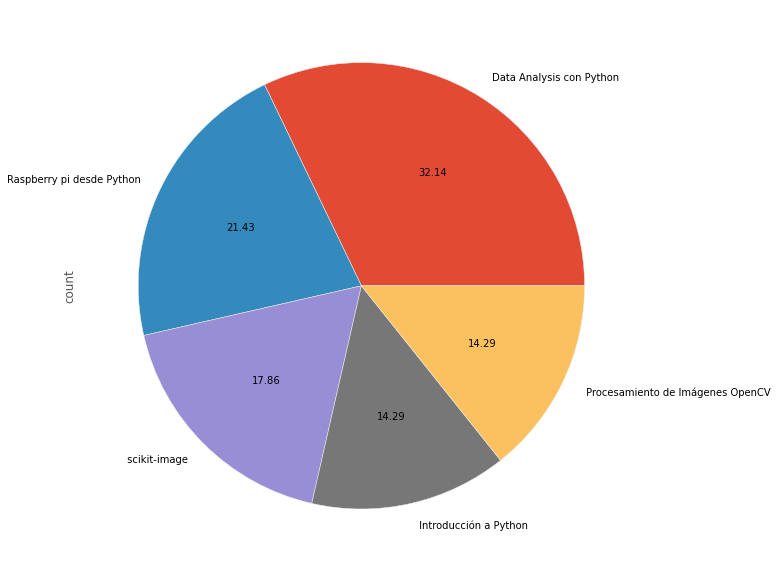

In [107]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

top_5_topics['count'].plot(kind='pie', autopct='%.2f', figsize=(10, 10))

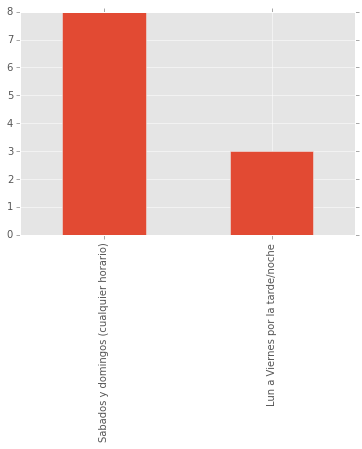

In [113]:
df_sin_nombres[df_sin_nombres.columns[-1]].value_counts().plot(kind='bar')